[18:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "iteration_range" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




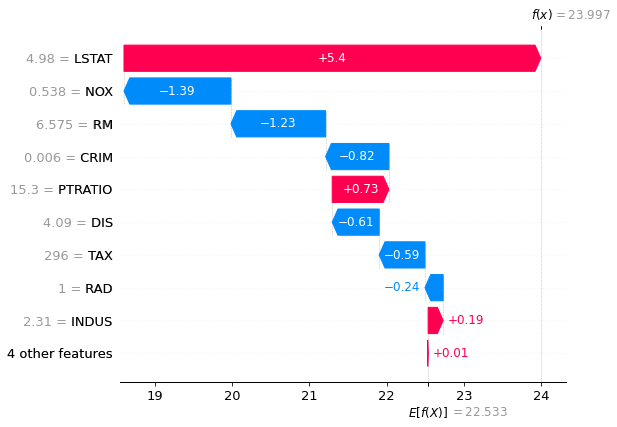

In [17]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor(tree_method = "gpu_hist", iteration_range = 1000).fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [18]:
import shap

import numpy as np
import xgboost as xgb

import numpy as np


In [19]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import fetch_california_housing

# Fetch dataset using sklearn
data = fetch_california_housing()
print( data.DESCR)
X = data.data
y = data.target

num_round = 500

param = {
    "eta": 0.05,
    "max_depth": 10,
    "tree_method": "gpu_hist",
}

# GPU accelerated training
dtrain = xgb.DMatrix(X, label=y, feature_names=data.feature_names)
%time model = xgb.train(param, dtrain,num_round)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [20]:
%%time
# Compute shap values using GPU with xgboost
# model.set_param({"predictor":"cpu_predictor"})
model.set_param({"predictor": "gpu_predictor"})
shap_values = model.predict(dtrain, pred_contribs=True)

Wall time: 2.7 s


In [21]:
shap_interaction_values = model.predict(dtrain, pred_interactions=True)

In [23]:
import shap


# shap will call the GPU accelerated version as long as the predictor parameter is set to "gpu_predictor"
model.set_param({"predictor": "gpu_predictor"})
backgroud_data = X
explainer = shap.TreeExplainer(model, feature_perturbation="interventional", data=backgroud_data)
%time shap_values = explainer.shap_values(X, )

# visualize the first prediction's explanation
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X[0, :],
    feature_names=data.feature_names,
    matplotlib=True
)

 59%|============        | 12202/20640 [11:20<07:50]       

In [ ]:
import xgboost as xgb
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
import time

# Fetch dataset using sklearn
cov = fetch_covtype()
X = cov.data
y = cov.target

# Create 0.75/0.25 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75,
                                                    random_state=42)

# Specify sufficient boosting iterations to reach a minimum
num_round = 3000

# Leave most parameters as default
param = {'objective': 'multi:softmax', # Specify multiclass classification
         'num_class': 8, # Number of possible output classes
         'tree_method': 'gpu_hist' # Use GPU accelerated algorithm
         }

# Convert input data from numpy to XGBoost format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

gpu_res = {} # Store accuracy result
tmp = time.time()
# Train model
xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_res)
print("GPU Training Time: %s seconds" % (str(time.time() - tmp)))

# Repeat for CPU algorithm
tmp = time.time()
param['tree_method'] = 'hist'
cpu_res = {}
xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=cpu_res)
print("CPU Training Time: %s seconds" % (str(time.time() - tmp)))

In [6]:
model = xgb.Booster()
model.load_model("data/WS/model_fits/xgb_opt_1_iter_1/model_3.model")

XGBoostError: [16:11:22] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "data/WS/model_fits/xgb_opt_1_iter_1/model_3.model": No such file or directory

In [9]:
booster = xgb.Booster()
booster.load_model("C:/Users/User/Documents/ExplainableML_SuDS/data/WS/model_fits/xgb_opt_1_iter_1/model_1.model")

In [11]:
   explainer = shap.TreeExplainer(
        booster, feature_perturbation="observational"
    )

In [14]:
import shap

import numpy as np
import xgboost as xgb

import numpy as np


In [19]:
eval_grid = np.genfromtxt(
    "C:/Users/User/Documents/ExplainableML_SuDS/data/WS/model_fits/optimal_candidate_id.csv",
    delimiter=",",
    skip_header=1,
    dtype="int",
)

In [20]:
eval_grid

array([[  1,   1,  97],
       [  1,   2,  93],
       [  1,   3,  73],
       [  1,   4,  89],
       [  1,   5,  89],
       [  2,   1,  64],
       [  2,   2, 100],
       [  2,   3, 100],
       [  2,   4,  94],
       [  2,   5,  87],
       [  3,   1,  76],
       [  3,   2,  77],
       [  3,   3,  88],
       [  3,   4,  92],
       [  3,   5,  99],
       [  4,   1,  77],
       [  4,   2,  70],
       [  4,   3,  83],
       [  4,   4,  70],
       [  4,   5,  73]])

In [9]:
import shap

import numpy as np
import xgboost as xgb

import numpy as np


def read_xgboost_data(option, outer_i, model_id):
    """
    This function reads training and test data for computing SHAP value
    """
    train_fname = (
        "./data/WS/model_fits/xgb_opt_"
        + option.__str__()
        + "_iter_"
        + outer_i.__str__()
        + "/train_"
        + model_id.__str__()
        + ".csv"
    )

    test_fname = (
        "./data/WS/model_fits/xgb_opt_"
        + option.__str__()
        + "_iter_"
        + outer_i.__str__()
        + "/test_"
        + model_id.__str__()
        + ".csv"
    )
    dtrain = np.genfromtxt(train_fname, delimiter=",", skip_header=1)
    dtest = np.genfromtxt(test_fname, delimiter=",", skip_header=1)

    return dtrain, dtest


def read_xgboost_model(option, outer_i, model_id):
    """
    This function reads trained xgboost models;
    The solution from the following link is used:
    https://github.com/slundberg/shap/issues/1215#issue-619973736
    https://github.com/slundberg/shap/issues/1215#issuecomment-641102855
    """
    model_fname = (
        "./data/WS/model_fits/xgb_opt_"
        + option.__str__()
        + "_iter_"
        + outer_i.__str__()
        + "/model_"
        + model_id.__str__()
        + ".model"
    )

    booster = xgb.Booster()
    booster.load_model(model_fname)

    model_bytearray = booster.save_raw()[4:]
    booster.save_raw = lambda: model_bytearray

    return booster


def save_shap(option, outer_i, model_id, backgroud_portion):
    """
    This function computes SHAP value and save it
    """

    shap_train_fname = (
        "./data/WS/model_fits/xgb_opt_"
        + option.__str__()
        + "_iter_"
        + outer_i.__str__()
        + "/shap_train_"
        + model_id.__str__()
        + ".csv"
    )

    shap_test_fname = (
        "./data/WS/model_fits/xgb_opt_"
        + option.__str__()
        + "_iter_"
        + outer_i.__str__()
        + "/shap_test_"
        + model_id.__str__()
        + ".csv"
    )

    # read dataset
    dtrain, dtest = read_xgboost_data(option, outer_i, model_id)

    # read model
    booster = read_xgboost_model(option, outer_i, model_id)

    # set up TreeExplainer
    np.random.seed(option * outer_i * model_id)
    random_indices = np.random.choice(
        dtrain.shape[0], size=round(dtrain.shape[0] * backgroud_portion), replace=False
    )
    backgroud_data = dtrain[random_indices, :]

    if backgroud_portion == 1:
        backgroud_data = dtrain

    explainer = shap.TreeExplainer(
        booster, feature_perturbation="interventional", data=backgroud_data
    )

    train_shap_values = explainer.shap_values(dtrain)
    np.savetxt(shap_train_fname, train_shap_values, delimiter=",")

    test_shap_values = explainer.shap_values(dtest)
    np.savetxt(shap_test_fname, test_shap_values, delimiter=",")

    return 0


eval_grid = np.genfromtxt(
    "./data/WS/model_fits/optimal_candidate_id.csv",
    delimiter=",",
    skip_header=1,
    dtype="int",
)


In [10]:
option, outer_i, model_id = eval_grid[0,:]

In [11]:
    shap_train_fname = (
        "./data/WS/model_fits/xgb_opt_"
        + option.__str__()
        + "_iter_"
        + outer_i.__str__()
        + "/shap_train_"
        + model_id.__str__()
        + ".csv"
    )

    shap_test_fname = (
        "./data/WS/model_fits/xgb_opt_"
        + option.__str__()
        + "_iter_"
        + outer_i.__str__()
        + "/shap_test_"
        + model_id.__str__()
        + ".csv"
    )

    # read dataset
    dtrain, dtest = read_xgboost_data(option, outer_i, model_id)

    # read model
    booster = read_xgboost_model(option, outer_i, model_id)

    # set up TreeExplainer
    np.random.seed(option * outer_i * model_id)
    random_indices = np.random.choice(
        dtrain.shape[0], size=round(dtrain.shape[0] * 0.05), replace=False
    )
    backgroud_data = dtrain[random_indices, :]

In [12]:
    explainer = shap.explainers.GPUTree(
        booster, feature_perturbation="interventional", data=backgroud_data
    )

    train_shap_values = explainer.shap_values(dtrain)

cuda extension was not built during install!


ImportError: cannot import name '_cext_gpu' from partially initialized module 'shap' (most likely due to a circular import) (C:\Users\User\Anaconda3\envs\xgboost-env\lib\site-packages\shap\__init__.py)

In [4]:
import shap

import numpy as np
import xgboost as xgb

import numpy as np
import pandas as pd


# Defining the dictionaries
cpu_dict = {
    'objective': 'reg:squarederror'
}

gpu_dict = {
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist'
}

# Number of rows to train on 
nrows = [
    10, 
    100, 
    200, 
    3000, 
    5000, 
    10000, 
    20000, 
    50000, 
    100000, 
    300000
]
cpu_speeds = []
gpu_speeds = []

for nrow in nrows: 
    # Sampling random rows 
    sample = pd.sample(nrow)
    
    # Creating X and Y 
    X = pd.get_dummies(sample[features])
    Y = sample['Sales']
    
    # Initiating the model objects
    cpu = xgb.XGBRegressor(**cpu_dict)
    gpu = xgb.XGBRegressor(**gpu_dict)
    
    # Training on cpu 
    start = time.time()
    cpu.fit(X, Y)
    cpu_speed = time.time() - start
    
    # Training on gpu
    start = time.time()
    gpu.fit(X, Y)
    gpu_speed = time.time() - start
    
    # Appending the speed results 
    cpu_speeds.append(cpu_speed)
    gpu_speeds.append(gpu_speed)

# Creating a dataframe 
speeds = pd.DataFrame({
    'nrows': nrows,
    'cpu_speeds': cpu_speeds,
    'gpu_speeds': gpu_speeds
})

speeds['difference'] = speeds['cpu_speeds'] - speeds['gpu_speeds'] 

AttributeError: module 'pandas' has no attribute 'sample'